# Testing - analyze whole chapter instead of average of sentences

In [1]:
import re
import pandas as pd
import numpy as np
from collections import defaultdict

# Set Pandas to display all rows of dataframes
pd.set_option('display.max_rows', 500)

# nltk
from nltk import tokenize

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Plotting tools
import matplotlib.pyplot as plt
import matplotlib
plt.style.use('fivethirtyeight')
%matplotlib inline

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

from tqdm import tqdm_notebook as tqdm
from tqdm import trange


import os 
from pathlib import Path

In [2]:
from src import my_books_sentiment_analyzer as my_analyzer

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\arace\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
directory_path = my_analyzer.get_books_directory_path()

In [4]:
books = []
books = my_analyzer.get_list_of_books(directory_path, books)


['1984.txt', 'Aladdin-Ruth_Hobart.txt', 'at_the_mountains_of_madness.txt', 'Brave_New_World_Aldous_Huxley.txt', 'Peter_Pan-J_M_Barrie.txt', 'Sleeping_Beauty-Charles_Perrault.txt', 'The Call of Cthulhu - H. P. Lovecraft.txt', 'The_Old_Man_and_the_Sea-Ernest_Hemingway.txt']


In [5]:
books_elements_pattern = my_analyzer.define_pattern_to_get_chapters_information()

In [6]:
my_books_dictionary = defaultdict(dict)
my_books_dictionary = my_analyzer.initialize_books_dictionary(directory_path, my_books_dictionary, books, books_elements_pattern)

In [7]:
analyzer = SentimentIntensityAnalyzer()

In [8]:
my_books_dictionary = my_analyzer.get_sentiment_analysis_from_entire_chapter(my_books_dictionary)

1984



Aladdin-Ruth_Hobart



at_the_mountains_of_madness



Brave_New_World_Aldous_Huxley



Peter_Pan-J_M_Barrie



Sleeping_Beauty-Charles_Perrault



The Call of Cthulhu - H. P. Lovecraft



The_Old_Man_and_the_Sea-Ernest_Hemingway


In [9]:
my_books_dictionary

{'1984': {'Chapter1': ('Chapter 1 PART ONE - No title',
   "\n\n\n\nIt was a bright cold day in April, and the clocks were striking thirteen.\nWinston Smith, his chin nuzzled into his breast in an effort to escape the\nvile wind, slipped quickly through the glass doors of Victory Mansions,\nthough not quickly enough to prevent a swirl of gritty dust from entering\nalong with him.\n\nThe hallway smelt of boiled cabbage and old rag mats. At one end of it a\ncoloured poster, too large for indoor display, had been tacked to the wall.\nIt depicted simply an enormous face, more than a metre wide: the face of a\nman of about forty-five, with a heavy black moustache and ruggedly handsome\nfeatures. Winston made for the stairs. It was no use trying the lift. Even\nat the best of times it was seldom working, and at present the electric\ncurrent was cut off during daylight hours. It was part of the economy drive\nin preparation for Hate Week. The flat was seven flights up, and Winston,\nwho was t

In [10]:
compound_sentiments = my_analyzer.get_compount_sentiments(my_books_dictionary)

In [11]:
compound_sentiments

[-0.9996,
 -0.9948,
 -0.9954,
 0.7384,
 0.9941,
 0.9941,
 -0.9844,
 0.736,
 -0.998,
 0.9993,
 0.9029,
 0.9993,
 -0.999,
 0.9291,
 -0.9867,
 -0.5443,
 -0.9988,
 -0.9999,
 0.9857,
 -0.9995,
 -0.9999,
 -0.9991,
 0.9973,
 -0.9989,
 0.9994,
 0.9997,
 0.9993,
 0.9997,
 -0.9995,
 -0.9996,
 0.991,
 -0.8921,
 0.9918,
 0.9961,
 0.9098,
 0.9899,
 -0.9998,
 -0.9992,
 0.9998,
 -0.9771,
 0.9997,
 0.9991,
 0.9999,
 0.9992,
 -0.9995,
 0.9623,
 0.9982,
 -0.9895,
 0.9997,
 -0.9968,
 -0.9989,
 -0.9995,
 0.9938,
 0.9996,
 0.981,
 -0.9995,
 0.9967,
 0.996,
 0.8297,
 -0.9596,
 0.9287,
 0.9425,
 0.9991,
 0.999,
 -0.997,
 -0.9989,
 -0.9972,
 0.9988,
 0.9975,
 0.9997,
 0.9992,
 0.9145,
 -0.9895]

In [12]:
my_analyzer.print_books_chapters_compound_sentiment(my_books_dictionary, compound_sentiments)

1984
  Chapter 1 - Chapter 1 PART ONE - No title
       -0.9996
  Chapter 2 - Chapter 2 PART ONE - No title
       -0.9948
  Chapter 3 - Chapter 3 PART ONE - No title
       -0.9954
  Chapter 4 - Chapter 4 PART ONE - No title
       0.7384
  Chapter 5 - Chapter 5 PART ONE - No title
       0.9941
  Chapter 6 - Chapter 6 PART ONE - No title
       0.9941
  Chapter 7 - Chapter 7 PART ONE - No title
       -0.9844
  Chapter 8 - Chapter 8 PART ONE - No title
       0.736
  Chapter 9 - Chapter 1 PART TWO - No title
       -0.998
  Chapter 10 - Chapter 2 PART TWO - No title
       0.9993
  Chapter 11 - Chapter 3 PART TWO - No title
       0.9029
  Chapter 12 - Chapter 4 PART TWO - No title
       0.9993
  Chapter 13 - Chapter 5 PART TWO - No title
       -0.999
  Chapter 14 - Chapter 6 PART TWO - No title
       0.9291
  Chapter 15 - Chapter 7 PART TWO - No title
       -0.9867
  Chapter 16 - Chapter 8 PART TWO - No title
       -0.5443
  Chapter 17 - Chapter 9 PART TWO - No title
       -0.

In [13]:
book_indices = my_analyzer.get_books_indices(my_books_dictionary)
book_indices

{'1984': (0, 25),
 'Aladdin-Ruth_Hobart': (25, 26),
 'at_the_mountains_of_madness': (26, 38),
 'Brave_New_World_Aldous_Huxley': (38, 56),
 'Peter_Pan-J_M_Barrie': (56, 63),
 'Sleeping_Beauty-Charles_Perrault': (63, 64),
 'The Call of Cthulhu - H. P. Lovecraft': (64, 67),
 'The_Old_Man_and_the_Sea-Ernest_Hemingway': (67, 73)}

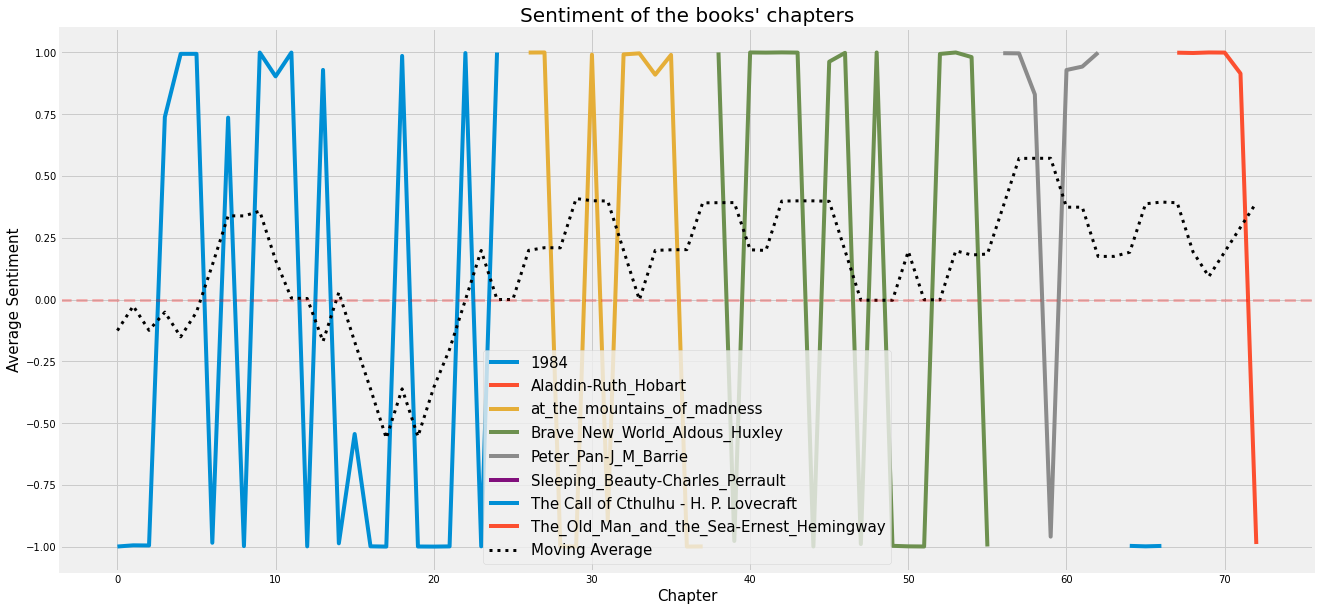

In [14]:
my_analyzer.plot_books_chapters_sentiment(my_books_dictionary, compound_sentiments, book_indices)

In [15]:
sentiment_scores = my_analyzer.get_chapters_sentiment_scores_values(my_books_dictionary)

In [16]:
my_analyzer.print_average_books_sentiment(sentiment_scores, book_indices)

Average Book Sentiment:

1984                                         -12.89%
Aladdin-Ruth_Hobart                          99.97%
at_the_mountains_of_madness                  16.56%
Brave_New_World_Aldous_Huxley                22.06%
Peter_Pan-J_M_Barrie                         67.62%
Sleeping_Beauty-Charles_Perrault             99.90%
The Call of Cthulhu - H. P. Lovecraft        -99.77%
The_Old_Man_and_the_Sea-Ernest_Hemingway     65.34%


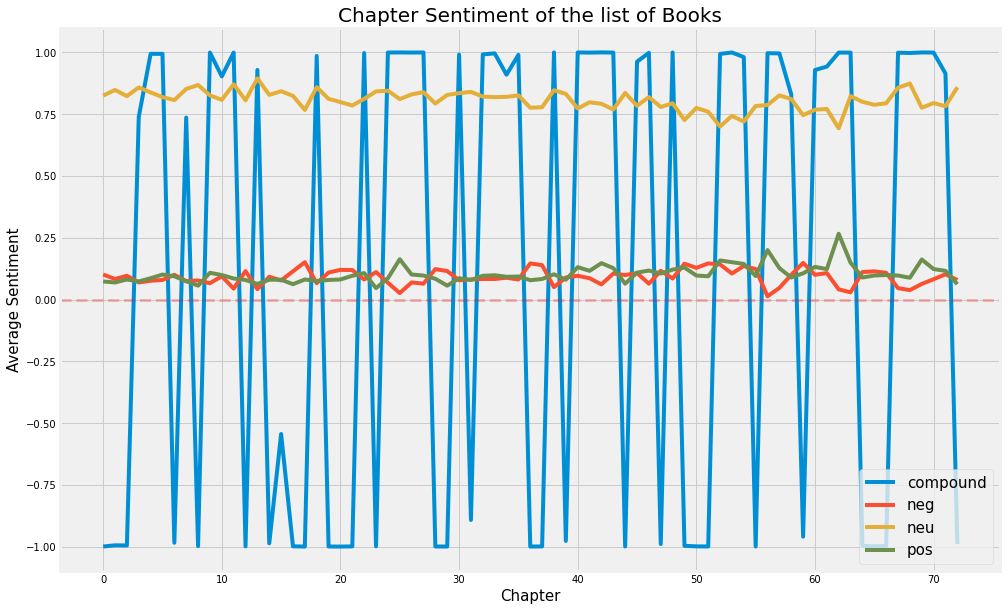

In [17]:
my_analyzer.plot_sentiment_of_entire_serie_of_books(my_books_dictionary, sentiment_scores)